The most potential category is 'cine_photo' with a total growth rate of 160.00%.


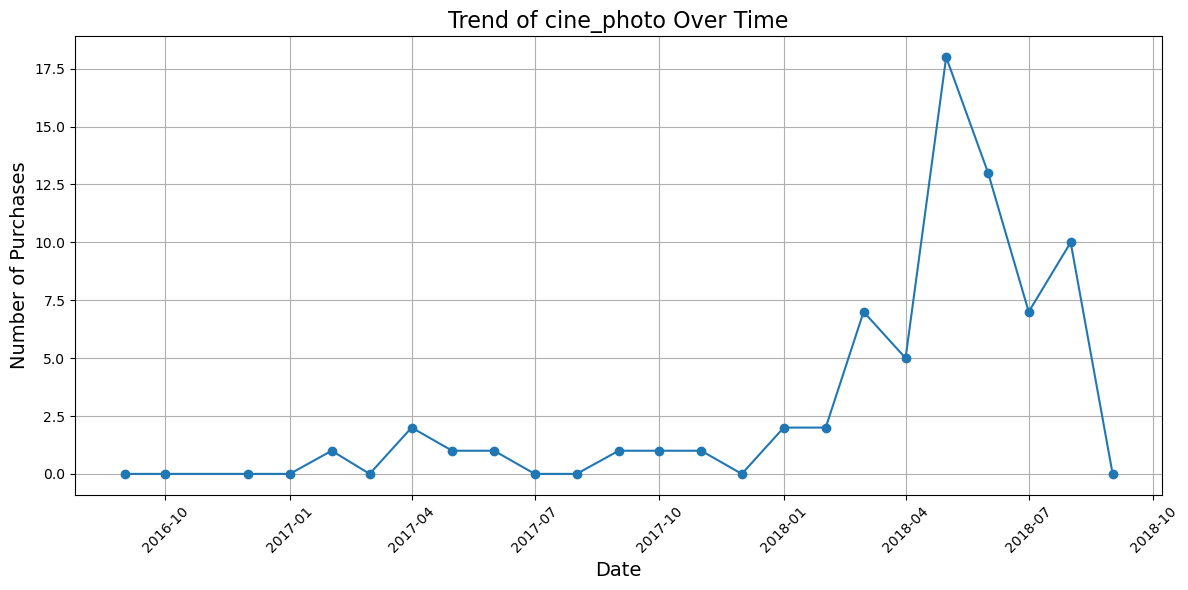

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned dataset
full_data = pd.read_csv('cleaned_full_data.csv')

# Group by month and category, counting the number of orders
monthly_trends = full_data.groupby(['order_year', 'order_month', 'product_category_name_english'])['order_id'].count().reset_index()

# Create a date column from year and month
monthly_trends['date'] = pd.to_datetime(monthly_trends['order_year'].astype(str) + '-' + monthly_trends['order_month'].astype(str) + '-01')

# Pivot the data to have categories as columns and dates as rows
pivot_table = monthly_trends.pivot_table(index='date', columns='product_category_name_english', values='order_id', fill_value=0)

# Calculate the percentage change
growth_rates = pivot_table.pct_change().fillna(0)

# Filter out infinite growth rates and NaN values
filtered_growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

# Sum the growth rates to identify the most potential category with the highest increase
total_growth = filtered_growth_rates.sum().sort_values(ascending=False)

# Display the most potential category if there are valid results
if not total_growth.empty:
    most_potential_category = total_growth.index[0]
    highest_growth_value = total_growth.iloc[0] 
    print(f"The most potential category is '{most_potential_category}' with a total growth rate of {highest_growth_value:.2%}.")
    
    # Optional: Plot the growth of the most potential category over time
    plt.figure(figsize=(12, 6))
    plt.plot(pivot_table.index, pivot_table[most_potential_category], marker='o')
    plt.title(f'Trend of {most_potential_category} Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Purchases', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid categories with growth rates found.")
